# Mini-Projeto
# Inteligência Artificial na Agricultura

In [8]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


Carregando pacotes

In [9]:
# Imports
import sklearn
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation
from tensorflow.keras.layers.experimental.preprocessing import RandomZoom
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision
from tensorflow.keras.metrics import Recall

In [10]:
# Seed para reprodutibilidade (é uma semente para sempre reproduzir igual)
tf.random.set_seed(4)

# Carregando as imagens (fruits)

In [11]:
# Diretório atual
diretorio_atual = Path.cwd()
print(diretorio_atual)

c:\Users\erica\OneDrive\Documentos\GitHub\Mini_Projeto_IA_na_Agricultura


In [12]:
# Caminho para os dados de treino
caminho_dados_treino = Path("fruits-360/Training")

In [13]:
# Caminho para os dados de teste
caminho_dados_teste = Path("fruits-360/Test")

In [14]:
# Listando o conteúdo da pasta
imagens_treino = list(caminho_dados_treino.glob("*/*"))

In [15]:
# Visualiza uma amostra da lista
imagens_treino[925:936]

[WindowsPath('fruits-360/Training/Apple Crimson Snow/r_90_100.jpg'),
 WindowsPath('fruits-360/Training/Apple Crimson Snow/r_91_100.jpg'),
 WindowsPath('fruits-360/Training/Apple Crimson Snow/r_92_100.jpg'),
 WindowsPath('fruits-360/Training/Apple Crimson Snow/r_93_100.jpg'),
 WindowsPath('fruits-360/Training/Apple Crimson Snow/r_94_100.jpg'),
 WindowsPath('fruits-360/Training/Apple Crimson Snow/r_95_100.jpg'),
 WindowsPath('fruits-360/Training/Apple Crimson Snow/r_96_100.jpg'),
 WindowsPath('fruits-360/Training/Apple Crimson Snow/r_97_100.jpg'),
 WindowsPath('fruits-360/Training/Apple Crimson Snow/r_98_100.jpg'),
 WindowsPath('fruits-360/Training/Apple Crimson Snow/r_99_100.jpg'),
 WindowsPath('fruits-360/Training/Apple Crimson Snow/r_9_100.jpg')]

In [16]:
# Expressão lambda que extrai apenas o valor com o caminho de cada imagem
imagens_treino = list(map(lambda x: str(x), imagens_treino))

In [17]:
# Visualiza uma amostra da lista
imagens_treino[925:936]

['fruits-360\\Training\\Apple Crimson Snow\\r_90_100.jpg',
 'fruits-360\\Training\\Apple Crimson Snow\\r_91_100.jpg',
 'fruits-360\\Training\\Apple Crimson Snow\\r_92_100.jpg',
 'fruits-360\\Training\\Apple Crimson Snow\\r_93_100.jpg',
 'fruits-360\\Training\\Apple Crimson Snow\\r_94_100.jpg',
 'fruits-360\\Training\\Apple Crimson Snow\\r_95_100.jpg',
 'fruits-360\\Training\\Apple Crimson Snow\\r_96_100.jpg',
 'fruits-360\\Training\\Apple Crimson Snow\\r_97_100.jpg',
 'fruits-360\\Training\\Apple Crimson Snow\\r_98_100.jpg',
 'fruits-360\\Training\\Apple Crimson Snow\\r_99_100.jpg',
 'fruits-360\\Training\\Apple Crimson Snow\\r_9_100.jpg']

In [27]:
# Total de imagens de treino
len(imagens_treino)

67692

# Pré-Processamento dos dados

In [18]:
# Função que obtém o label de cada imagem
def extrai_label(caminho_imagem):
    return caminho_imagem.split("\\")[-2]

In [19]:
# Aplica a função
imagens_treino_labels = list(map(lambda x: extrai_label(x), imagens_treino))

In [20]:
# Visualiza uma amostra
imagens_treino_labels[840:846]

['Apple Crimson Snow',
 'Apple Crimson Snow',
 'Apple Crimson Snow',
 'Apple Crimson Snow',
 'Apple Crimson Snow',
 'Apple Crimson Snow']

> Label encoding (convertendo string para valor numérico)

In [21]:
# não podemos entregar uma string para um modelo de IA, então temos que converter para valores numéricos
# Cria o objeto
encoder = LabelEncoder()

In [22]:
# Aplica o fit_transform
imagens_treino_labels = encoder.fit_transform(imagens_treino_labels)

In [23]:
# Visualiza uma amostra
imagens_treino_labels[840:846]

array([1, 1, 1, 1, 1, 1], dtype=int64)

In [24]:
# Aplicamos One-Hot-Encoding nos labels
imagens_treino_labels = tf.keras.utils.to_categorical(imagens_treino_labels)

In [25]:
# Visualiza uma amostra
imagens_treino_labels[840:846]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [26]:
# Dividimos os dados de treino em duas amostras, treino e validação
X_treino, X_valid, y_treino, y_valid = train_test_split(imagens_treino, imagens_treino_labels)

In [27]:
X_treino[15:18]

['fruits-360\\Training\\Fig\\177_100.jpg',
 'fruits-360\\Training\\Nut Forest\\28_100.jpg',
 'fruits-360\\Training\\Pear Stone\\r_243_100.jpg']

In [28]:
y_treino[15:18]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.,

# Data Augmentation

In [29]:
# Redimensionamento de todas as imagens para 224 x 224
img_size = 224
resize = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.Resizing(img_size, img_size)])

In [30]:
# Cria o objeto para dataset augmentation
data_augmentation = tf.keras.Sequential([RandomFlip("horizontal"),
                                         RandomRotation(0.2),
                                         RandomZoom(height_factor = (-0.3,-0.2)) ])

# Preparando os dados

In [31]:
# Hiperparâmnetros
batch_size = 32 # 32 são os lotes de imagens, lotes muitos grandes exigem mais do computador
autotune = tf.data.experimental.AUTOTUNE

In [32]:
# Função para carregar e transformar as imagens
def carrega_transforma(image, label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels = 3)
    return image, label

In [33]:
# Função para preparar os dados noo formato do TensorFlow
def prepara_dataset(path, labels, train = True): # usa-se o dataset augmentation apenas para dados de treino ou seja train=true

    # Prepara os dados
    image_paths = tf.convert_to_tensor(path)
    labels = tf.convert_to_tensor(labels)
    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)
    dataset = tf.data.Dataset.zip((image_dataset, label_dataset))
    dataset = dataset.map(lambda image, label: carrega_transforma(image, label)) 
    dataset = dataset.map(lambda image, label: (resize(image), label), num_parallel_calls = autotune)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(batch_size)

    # Se train = True aplica dataset augmentation
    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label), num_parallel_calls = autotune)
  
    # Se train = False repete sobre o dataset e retorna
    dataset = dataset.repeat()

    return dataset

In [34]:

# Cria o dataset de treino

dataset_treino = prepara_dataset(X_treino, y_treino)

In [35]:
# Shape
imagem, label = next(iter(dataset_treino))
print(imagem.shape)
print(label.shape)

(32, 224, 224, 3)
(32, 131)


Watermelon


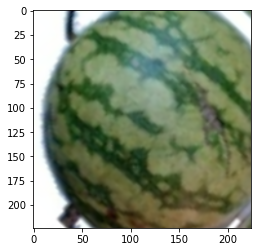

In [36]:
# Vamos visualizar uma imagem e um label
print(encoder.inverse_transform(np.argmax(label, axis = 1))[0])
plt.imshow((imagem[0].numpy()/255).reshape(224,224,3))

In [37]:
# Cria o dataset de validação
dataset_valid = prepara_dataset(X_valid, y_valid, train = False)

In [38]:
# Shape
imagem, label = next(iter(dataset_valid))
print(imagem.shape) 
print(label.shape)

(32, 224, 224, 3)
(32, 131)


## Construção do Modelo

In [39]:
# Carregando um modelo pré-treinado
modelo_pre = EfficientNetB3(input_shape = (224,224,3), include_top = False)

In [40]:
# Adicionando nossas próprias camadas ao modelo_pre
modelo = tf.keras.Sequential([modelo_pre,
                              tf.keras.layers.GlobalAveragePooling2D(),
                              tf.keras.layers.Dense(131, activation = 'softmax')])# o modelo vai entregar 131 probabilidades porque tem 131 pastas de frutas

In [41]:
# Sumário do modelo
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 7, 7, 1536)       10783535  
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 131)               201347    
                                                                 
Total params: 10,984,882
Trainable params: 10,897,579
Non-trainable params: 87,303
_________________________________________________________________


In [43]:
# Hiperparâmetros
lr = 0.001
beta1 = 0.9
beta2 = 0.999
ep = 1e-07

In [44]:
# Compilação do modelo
modelo.compile(optimizer = Adam(learning_rate = lr, 
                                beta_1 = beta1, 
                                beta_2 = beta2, 
                                epsilon = ep),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy', Precision(name = 'precision'), Recall(name = 'recall')])

> Vamos treinar o modelo por apenas uma época e verificar as métricas.

In [45]:
# Não precisamos mais do modelo_pre
modelo.layers[0].trainable = False

In [46]:
# Checkpoint
checkpoint = tf.keras.callbacks.ModelCheckpoint("modelo/melhor_modelo.h5", # aqui quando encontrar o modelo ideal ele salva no disco
                                                verbose = 1, 
                                                save_best = True, 
                                                save_weights_only = True)

In [47]:
# Early stop
# vou aguardar 4 iterações, se durante 4 iterações não houver melhora vou parar o treinamento
early_stop = tf.keras.callbacks.EarlyStopping(patience = 4) 

In [62]:
# Sumário
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 7, 7, 1536)       10783535  
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 131)               201347    
                                                                 
Total params: 10,984,882
Trainable params: 201,347
Non-trainable params: 10,783,535
_________________________________________________________________


Essa fase leva horas e até dias dependendo da memória do computador (usando somente cpu)

In [ ]:
#(somente se tiver (GPU))
# !nvidia-smi 

Thu Apr 14 10:02:48 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 457.49       Driver Version: 457.49       CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce MX110      WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   41C    P8    N/A /  N/A |     37MiB /  2048MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [63]:
%%time
history = modelo.fit(dataset_treino,
                     steps_per_epoch = len(X_treino)//batch_size,
                     epochs = 6, # pode mudar as épocas para melhorar a acurária, temos que ir experimentando
                     validation_data = dataset_valid,
                     validation_steps = len(y_treino)//batch_size,
                     callbacks = [checkpoint, early_stop])

Epoch 1/6
 626/1586 [==========>...................] - ETA: 19:26:33 - loss: 0.4911 - accuracy: 0.8771 - precision: 0.9449 - recall: 0.8337

# Avaliação do modelo

In [ ]:
# Para carregar os pesos, precisamos descongelar as camadas
modelo.layers[0].trainable = True

In [ ]:
# Carrega os pesos do ponto de verificação e reavalie
modelo.load_weights("modelo/melhor_modelo.h5") # está disponível o modelo criado, mas é melhor avaliar seu próprio modelo

> Carregamos os dados de teste.

In [ ]:
# Carregando e preparando os dados de teste
camninho_imagens_teste = list(caminho_dados_teste.glob("*/*"))
imagens_teste = list(map(lambda x: str(x), camninho_imagens_teste))
imagens_teste_labels = list(map(lambda x: extrai_label(x), imagens_teste))
imagens_teste_labels = encoder.fit_transform(imagens_teste_labels)
imagens_teste_labels = tf.keras.utils.to_categorical(imagens_teste_labels)
test_image_paths = tf.convert_to_tensor(imagens_teste)
test_image_labels = tf.convert_to_tensor(imagens_teste_labels)

In [ ]:
# Função para decode das imagens
def decode_imagens(image, label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels = 3)
    image = tf.image.resize(image, [224,224], method = "bilinear")
    return image, label

In [ ]:
# Cria o dataset de teste
dataset_teste = (tf.data.Dataset
                 .from_tensor_slices((imagens_teste, imagens_teste_labels))
                 .map(decode_imagens)
                 .batch(batch_size))

In [ ]:
# Shape
imagem, label = next(iter(dataset_teste))
print(imagem.shape)
print(label.shape)

In [ ]:
# Visualiza uma imagem de teste
print(encoder.inverse_transform(np.argmax(label, axis = 1))[0])
plt.imshow((imagem[0].numpy()/255).reshape(224,224,3))

In [ ]:
# Avalia o modelo
loss, acc, prec, rec = modelo.evaluate(dataset_teste)

In [ ]:
print("Acurácia: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)

## Previsões com o Modelo Treinado

In [48]:
# Função para carregar uma nova imagem
def carrega_nova_imagem(image_path):
    image = tf.io.read_file(image_path)
    image = tf.io.decode_jpeg(image, channels = 3)
    image = tf.image.resize(image, [224,224], method = "bilinear")
    plt.imshow(image.numpy()/255)
    image = tf.expand_dims(image, 0) 
    return image

In [49]:
# Função para fazer previsões
def faz_previsao(image_path, model, enc):
    image = carrega_nova_imagem(image_path)
    prediction = model.predict(image)
    pred = np.argmax(prediction, axis = 1) 
    return enc.inverse_transform(pred)[0] 

In [ ]:
# Previsão
faz_previsao("imagens/imagem1.jpg", modelo, encoder) # "modelo" é o que foi treinado e está na memória do computador

In [ ]:
# Previsão
faz_previsao("imagens/imagem2.jpg", modelo, encoder)

In [ ]:
# Previsão
faz_previsao("imagens/imagem3.jpg", modelo, encoder)

In [ ]:
# Previsão
faz_previsao("imagens/imagem4.jpg", modelo, encoder)

In [ ]:
# Previsão
faz_previsao("imagens/imagem5.jpg", modelo, encoder)

## FIM